In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Homework 6: Permutation tests
# Due Monday 2/26 at 11:59pm

# **Helpful Resources:**

- [Getting help on a Jupyter Notebook](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/)

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands (worth returning to throughout this course)

- [Inferential Thinking: Chapter 12, Comparing Two Samples](https://inferentialthinking.com/chapters/12/Comparing_Two_Samples.html)

### Summary Procedure for permutation tests

1. Identify a null and alternative hypothesis.
2. Choose a test statistic.
3. Permute the members of the original groups and compute the test statistic.
4. Repeat this shuffling (permutation) many times, recording the test statistic.
5. Compare the distributions of test statistics from permutations with observed value.



In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Point Breakdown

| **Question #** | **Points**  |
| -------------- | :---------: |
| Question 1     | 30        |
| Question 2     | 30        |


## Question 1: Does seeding clouds influence rainfall? (42 pts)
The file `cloudseed.csv` contains precipitation data from a randomized experiment carried out in the 1970s in Florida to evaluate cloud seeding (a technique that involves injecting clouds with a
chemical to increase rainfall). On each of 52 days suitable for cloud seeding, the experimenters used a random mechanism to decide whether to seed clouds or not. A plane flew through the clouds each day regardless of seeding, and the plane’s pilot did not know the treatment. Precipitation was measured as total rain volume (in acre-feet) in the 24 hours following the plane’s run.

___



### Question 1a: Exploratory Visualization (12 pts)


Scatter the seeded vs unseeded data, trying to recreate the plot shown below. 
You don't have exactly match the layout of the image, but there are a few things needed as part of the grade.

- 4 pts: correct unseeded and seeded data
- 4 pts: correct x and y labels (precipitation, unseeded, seeded)
- 4 pts: markers showing the mean of each distribution

<img src='./seeding3.png' width="500px" />



<!-- BEGIN QUESTION -->



[Text(0, 0, 'Unseeded'), Text(1, 0, 'Seeded')]

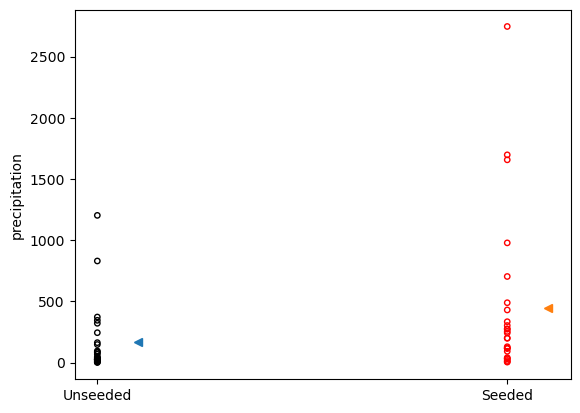

In [6]:
cloud_df=pd.read_csv('cloudseed.csv')

fig=plt.figure()
# fig.set_size_inches(5, 10)
ax1=fig.add_subplot(111)

ax1.scatter(np.zeros(len(cloud_df['seeded'])), cloud_df['unseeded'], edgecolor='k', s=15, facecolors= 'none')
ax1.plot(0.1, np.mean(cloud_df['unseeded']), '<')
ax1.scatter(np.zeros(len(cloud_df['seeded']),)+1, cloud_df['seeded'], edgecolor='r', s=15, facecolors= 'none')
ax1.plot(1.1, np.mean(cloud_df['seeded']), '<')
ax1.set_ylabel('precipitation')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Unseeded', 'Seeded'])


<!-- END QUESTION -->

### Bonus option #1
In above plot, it is hard to see all the data as many of the points are plotted over each other. One way to resolve this issue is to randomly scatter the horizontal position of each of the points. Try to implement that to improve the visualization.

*Not* worth extra credit.

<!-- BEGIN QUESTION -->



<!-- END QUESTION -->

### Question 1b: (3 pts)
We will test the null hypothesis that the unseeded and seeded data have the same mean precipitation, along with an alternative hypothesis that seeding resulted in higher mean precipitation. We will therefore use as a test statistic the difference between the means of seeded and unseeded data. (seeded - unseeded)

What is the observed value of this test statistic?
Save this value to `measured_test_statistic`


In [7]:
# Calculate the test statistic and save it to this variable.
measured_test_statistic = np.mean(cloud_df['seeded']) - np.mean(cloud_df['unseeded'])

In [8]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c: (7 pts)
Test the null hypothesis that this observed difference in mean precipitation would have occured by chance via a permutation test. Perform 1,000 permutations of the observed data. For each permutation, treat the mean difference between the shuffled groups as your test statistic. 

Save your permuted test statistics to a numpy array `permuted_mean_array`


In [9]:
comb_dt=np.append(cloud_df['seeded'], cloud_df['unseeded'])

num_permutations=1000
permuted_mean_array = np.zeros(num_permutations)

# Loop for number of permutations to construct an array of test statistics expected under null hypothesis
for ct in range(num_permutations):
    permuted_dt = np.random.permutation(comb_dt)
    fic_seeded=permuted_dt[0:len(cloud_df['seeded'])]
    fic_unseeded=permuted_dt[len(cloud_df['unseeded']):]
    permuted_mean_array[ct] = np.mean(fic_seeded) - np.mean(fic_unseeded)


In [10]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d (5 pts): Plot a histogram showing the distribution of the test statistic and a vertical line for the observed value.

- 3 pts: histogram of permuted_mean_array and vertical line of observed value  
- 2 pts: x label and title  

<!-- BEGIN QUESTION -->



Text(277.4000000000001, 200, 'observed \nvalue')

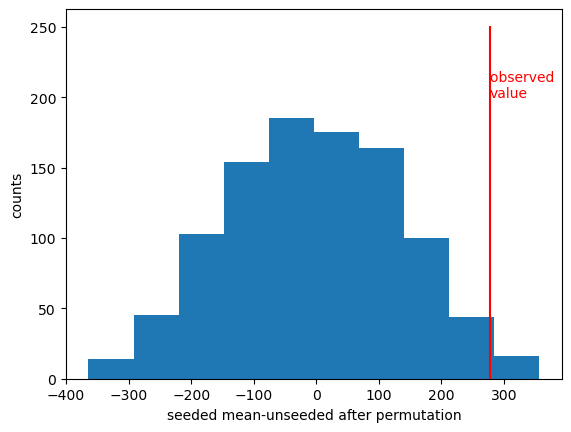

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(permuted_mean_array)
ax.set_ylabel('counts')
ax.set_xlabel('seeded mean-unseeded after permutation')
ax.plot([measured_test_statistic,measured_test_statistic], [0,250],'r')
ax.text(measured_test_statistic, 200,'observed \nvalue',color='r')

<!-- END QUESTION -->

### Question 1e: (3 pts)
According to your permutation test, what is the probability that the observed difference in means would have occurred via random sampling?   
Save this value to the variable `proportion_exceeding_observed`


In [12]:
proportion_exceeding_observed = np.sum(permuted_mean_array >= measured_test_statistic) / num_permutations
print("Proportion Exceeding Observed:", proportion_exceeding_observed)

Proportion Exceeding Observed: 0.019


In [13]:
grader.check("q1e")

q1e results: All test cases passed!

## Question 2: Estimating length changes in a northern pike population. (40 pts)
In 1989, the Minnesota Department of Natural Resources instituted a *slot limit* of 22-30 inches for fish in [Medicine Lake](https://en.wikipedia.org/wiki/Medicine_Lake_(Minnesota)), an ~ 460-acre lake in Beltrami County, MN. This means that all fish caught within this size interval had to be released. Using limited random samples from before and after the limit was imposed, try to estimate the effect of the slot limit on fish lengths. To do this, use `Pikedata.csv`, which contains length data from 73 fish caught in net collection traps in 1988 and 81 fish collected in 1993. From these limited samples, we will use permutations to test if the difference in mean length from 1993 to 1981 was due to random chance.
___


### Question 2a (13 pts):
Make two histograms on the same plot showing the distribution of 1988 and 1993 lengths.   
Make the 1993 histogram with the `histtype='step'` option.   
Plot the means of each distribution as downward facing triangles.  

Your does not have to match the given example, but it should have the following elements:

- 6 pts: histogram of 1988 and 1993 lengths with 1993 histogram as a step.
- 4 pts: downward traingle markers for the mean of each distriution
- 3 pts: x and y axis labels

hint: a downward facing triangle marker is denoted as `v`

<img src='./fish.png' width="500px" />

<!-- BEGIN QUESTION -->



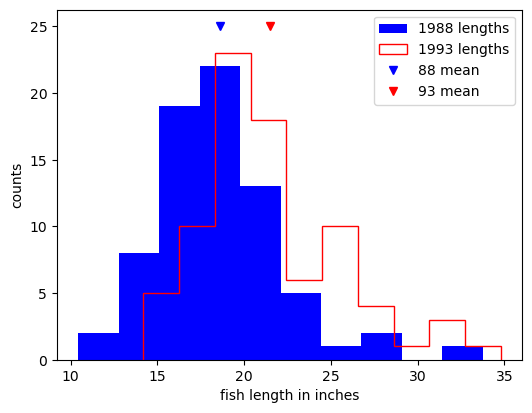

In [14]:
pike_df=pd.read_csv('Pikedata.csv')
df_1988 = pike_df[pike_df['year'] == 1988]['length.inches']
df_1993 = pike_df[pike_df['year'] == 1993]['length.inches']

fig=plt.figure()
fig.set_size_inches(6,10)
ax2=fig.add_subplot(211)

ax2.hist(df_1988, color='b', label='1988 lengths')
ax2.hist(df_1993, color='r', histtype='step', label='1993 lengths')
ax2.plot(np.mean(df_1988), 25, 'v', color='b', label='88 mean')
ax2.plot(np.mean(df_1993), 25, 'v', color='r', label='93 mean')
ax2.set_xlabel('fish length in inches')
ax2.set_ylabel('counts')
ax2.legend(['1988 lengths', '1993 lengths', '88 mean', '93 mean'])

<!-- END QUESTION -->

### Question 2b (3 pts):
Assign the observed difference in mean lengths between 1993 and 1988 to `observed_mean_difference`  
To be clear, the difference in means is: ( mean of 1993 lengths - mean of 1988 lengths)  



In [15]:
observed_mean_difference= np.mean(df_1993) - np.mean(df_1988)

In [16]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2C (6 pts):
Use a permutation test, with 1000 permutations, to calculate the distribution of mean differences expected under the null hypothesis that there was no difference between 1993 and 1988 fish lengths. 

Save your permuted test statistics in the variable `permuted_mean_array`
- You can make permuted_mean_array to be either a list or numpy array.

In [17]:
comb_dt=np.append(df_1988, df_1993)

num_permutations=1000
permuted_mean_array = np.zeros(num_permutations)

# Loop for number of permutations to construct an array of test statistics expected under null hypothesis
for ct in range(num_permutations):
    permuted_dt = np.random.permutation(comb_dt)
    fic_1993=permuted_dt[0:len(df_1993)]
    fic_1988=permuted_dt[len(df_1988):]
    permuted_mean_array[ct] = np.mean(fic_1993) - np.mean(fic_1988)

In [18]:
grader.check("q2c")

q2c results: All test cases passed!

### QUESTION 2d (5 pts): Plot a histogram showing the distribution of the test statistic and a vertical line for the observed value.

- 3 pts: histogram of permuted_mean_array and vertical line of observed value  
- 2 pts: x label and title  

<!-- BEGIN QUESTION -->



Text(2.8977574835109046, 200, 'observed \nvalue')

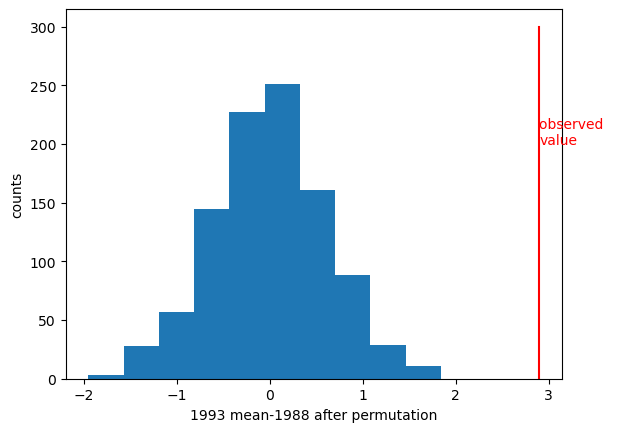

In [19]:
fig=plt.figure()
ax2d=fig.add_subplot(111)
ax2d.hist(permuted_mean_array)
ax2d.set_ylabel('counts')
ax2d.set_xlabel('1993 mean-1988 after permutation')
ax2d.plot([observed_mean_difference,observed_mean_difference], [0,300],'r')
ax2d.text(observed_mean_difference, 200,'observed \nvalue',color='r')

<!-- END QUESTION -->

### Question 2e (3 pts): 
For what proportion of this null distribution is the mean length difference greater than observed?  
Save your answer to the variable `proportion_exceeding_observed`

In [20]:
proportion_exceeding_observed= sum(permuted_mean_array>=observed_mean_difference)

In [21]:
grader.check("q2e")

q2e results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)